<a href="https://colab.research.google.com/github/Ttungjae/kb5000/blob/main/kbkb02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math as m
import numpy as np
from tkinter import *
!pip install -U finance-datareader
import FinanceDataReader as fdr
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Requirement already up-to-date: finance-datareader in c:\ancndaaa\lib\site-packages (0.9.32)


In [ ]:
#데이터프레임 생략 없음

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20

In [ ]:
list0=pd.array(["AAPL","JPM","NEE","LLY","PLD"]) #포트폴리오 입력
sday = pd.array([2020,1,1]) #날짜입력

In [ ]:
shirinkage = 0.75 # 분산수축

In [ ]:
def dfchange(X,Y,M,D): # X항목을 Y년 M월 D일부터 오늘까지의 포트폴리오 변화 데이터프레임 생성
    
    end = datetime.today()
    start = datetime(Y, M, D)
    
    for i in range(len(list0)):
        dfx1 = fdr.DataReader(list0[i], start, end)
        if i > 0:
            dfx0 = pd.concat([dfx0,dfx1[X]],axis=1)
        else :
            dfx0 = dfx1[X]
    
    dfx0.columns=list0
    
    return dfx0

In [ ]:
Y=sday[0];M=sday[1];D=sday[2]

In [ ]:
dfchange1=dfchange('Change',Y,M,D)
dfchange1.head(2)

,AAPL,JPM,NEE,LLY,PLD
Date,,,,,
2020-01-02,0.0228,0.0121,-0.0145,0.0059,-0.0083
2020-01-03,-0.0097,-0.0195,0.0070,-0.0033,0.0112


(<matplotlib.legend.Legend at 0x22ead410f40>,
                 AAPL      JPM       NEE      LLY       PLD
 Date                                                      
 2022-03-11  2.060594  0.91353  1.329199  2.01422  1.672285)

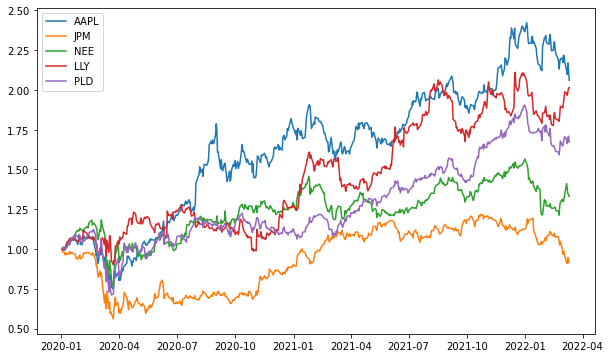

In [ ]:
dfchange2=dfchange('Close',Y,M,D)
plt.figure(figsize=(10,6))
rtn=dfchange2/dfchange2.iloc[0,:]

plt.plot(rtn)
plt.legend(list0),\
rtn.tail(1)

(          AAPL       JPM       NEE       LLY       PLD
 AAPL  1.000000  0.451281  0.498224  0.391171  0.610101
 JPM   0.451281  1.000000  0.442312  0.276552  0.547848
 NEE   0.498224  0.442312  1.000000  0.375530  0.650161
 LLY   0.391171  0.276552  0.375530  1.000000  0.440214
 PLD   0.610101  0.547848  0.650161  0.440214  1.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x22eae405910>)

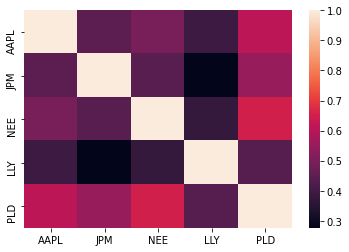

In [ ]:
cov=dfchange1.cov()*250
corr=dfchange1.corr()
corr,sns.heatmap(corr)

In [ ]:
def randw(N): #포트폴리오 랜덤비중 N 개 생성
    
    dfst = pd.DataFrame(list0).set_index(0)
    
    for i in range (N):   
        
        dfx1 = np.random.random(len(list0))
        dfx11=dfx1/sum(dfx1)
        dfst[i]=dfx11
        
    return dfst.T

In [ ]:
randw1=randw(5000)

In [ ]:
pfrtn=pd.DataFrame(np.dot(randw1,np.array(np.mean(dfchange1)*250).T))
pfvar=pd.DataFrame(np.diag(np.dot(np.dot(randw1,cov),randw1.T)))

pfvar=pfvar * shirinkage 

In [ ]:
dfmv = pd.concat([pfrtn,pfvar],axis=1)
dfmv.columns = ['portfolio return','portfolio varience']

usbr10 = fdr.DataReader('US10YT=X',start='20220101')
rf=usbr10['Close'].tail(1)
dfmv['SR']=(dfmv.iloc[:,0]-rf[0]/100)/np.sqrt(dfmv.iloc[:,1])

dfmv['SR']=dfmv.iloc[:,0]/np.sqrt(dfmv.iloc[:,1])
dfmv = pd.concat([randw1,dfmv],axis=1)
dfmv.head(2)

,AAPL,JPM,NEE,LLY,PLD,portfolio return,portfolio varience,SR
0,0.070627,0.068226,0.329969,0.271255,0.259924,0.270039,0.056799,1.133070
1,0.057675,0.202951,0.409240,0.302437,0.027698,0.230222,0.056156,0.971518


In [ ]:
dfmv1=dfmv.sort_values("SR",ascending=False)
dfSRdcnd=dfmv1.index

In [ ]:
dfdcnd=dfmv.iloc[dfSRdcnd,:]
dfdcnd.head(5)

,AAPL,JPM,NEE,LLY,PLD,portfolio return,portfolio varience,SR
1912,0.571551,0.009445,0.016650,0.311321,0.091032,0.380922,0.068224,1.458371
3371,0.363453,0.000542,0.041365,0.383607,0.211032,0.363051,0.062248,1.455138
3197,0.427321,0.055271,0.009790,0.473680,0.033938,0.369378,0.065324,1.445220
3578,0.386663,0.045806,0.023954,0.511443,0.032134,0.369001,0.065285,1.444176
2523,0.326567,0.025737,0.041660,0.551419,0.054617,0.368746,0.065420,1.441687


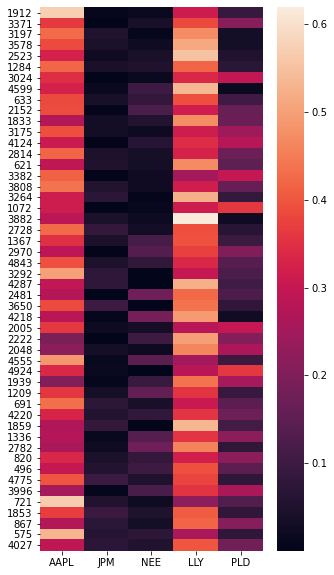

In [ ]:
plt.figure(figsize=(5,10))
sns.heatmap(dfdcnd.iloc[:50,:len(list0)])

In [ ]:
dfdcnd0=dfdcnd
for i in range (len(list0)-1):
    dfdcnd0=dfdcnd0[dfdcnd0[list0[i]]>dfdcnd0[list0[i+1]]]
dfdcnd0

,AAPL,JPM,NEE,LLY,PLD,portfolio return,portfolio varience,SR
1804,0.632334,0.159214,0.110618,0.070689,0.027144,0.318332,0.071306,1.192110
1299,0.442790,0.185909,0.153068,0.136118,0.082114,0.291404,0.061813,1.172074
3089,0.301262,0.201524,0.198510,0.193831,0.104874,0.271682,0.057340,1.134571
1659,0.323738,0.206784,0.203664,0.154447,0.111366,0.268679,0.058457,1.111263
326,0.611569,0.212850,0.132915,0.032445,0.010221,0.296813,0.071864,1.107202
3449,0.382379,0.237519,0.146745,0.138208,0.095149,0.272774,0.060916,1.105188
490,0.310000,0.227287,0.217973,0.193523,0.051217,0.264300,0.057568,1.101557
4422,0.461607,0.247985,0.143077,0.109557,0.037773,0.277127,0.063958,1.095798
2659,0.241710,0.212849,0.206010,0.190021,0.149410,0.260812,0.056928,1.093114
1906,0.337668,0.243329,0.208956,0.178385,0.031662,0.263181,0.058594,1.087248


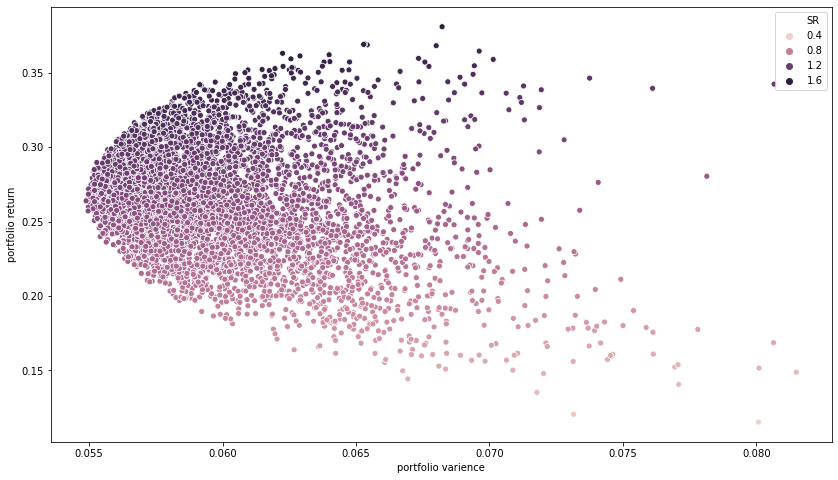

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=dfmv,x=dfmv.iloc[:,len(list0)+1],y=dfmv.iloc[:,len(list0)],hue='SR')

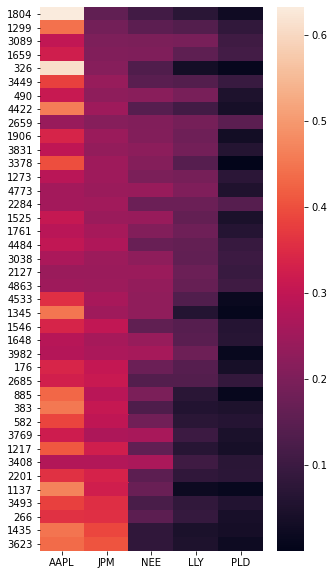

In [ ]:
plt.figure(figsize=(5,10))
sns.heatmap(dfdcnd0.iloc[:50,:len(list0)])

In [ ]:
dfbstW=dfdcnd0.iloc[0,:len(list0)]
dfbstW=np.array(dfbstW)
dfbstW

array([0.63233446, 0.15921428, 0.11061771, 0.0706892 , 0.02714435])

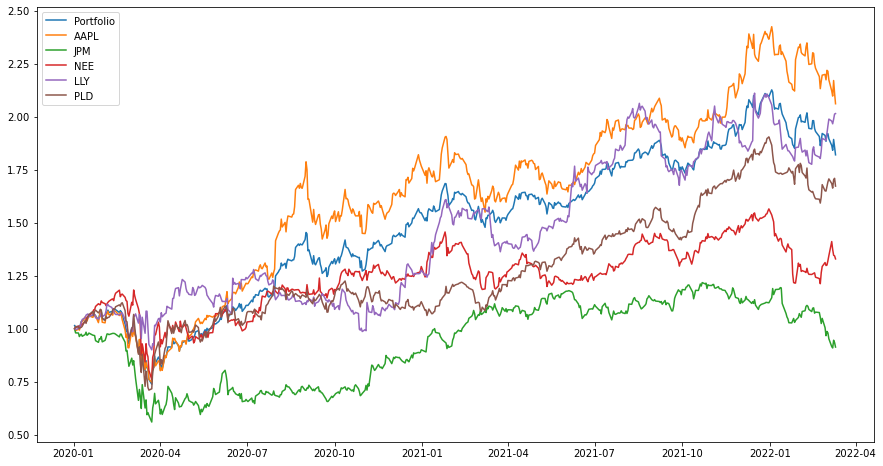

In [ ]:
bstpfrtn=pd.DataFrame(np.dot(dfchange1,dfbstW))
bstpfrtn=bstpfrtn+1
bstpfrtn0=bstpfrtn.cumprod()
bstpfrtn0.set_index(dfchange1.index,inplace=True)
bstpfrtn0.columns=['Portfolio']
dfT=pd.concat([bstpfrtn0,rtn],axis=1)

plt.figure(figsize=(15,8))
plt.plot(dfT)
plt.legend(dfT.columns)

## GUI(Tkinter)

In [ ]:
root = Tk()
root.title("Traing")
root.geometry("350x120")

# CREATING TEXT BOXES

for i in range (len(list0)) :    
    code1 = Entry(root, width=30)
    code1.grid(row=i,column=1,padx=20)
for i in range (len(list0)) :    
    title = Label(root, text="ticker")
    title.grid(row=i,column=0,padx=20)
    
root.mainloop()

In [ ]:
root = Tk()
root.title("Traing")
root.geometry("400x400")

e=Entry(root, width =35, borderwidth=5)
e.pack()
e.insert(30, "enter your name")

def myClick():
    hello = "Hello "+e.get()
    myLable = Label(root, text =hello)
    myLable.pack()

mybutton = Button(root,text='Enter your name',command=myClick,fg="blue",bg="white")
mybutton.pack()

root.mainloop()

In [ ]:
root = Tk()

myLable1 = Label(root, text="hhh")
myLable2 = Label(root, text="hhhhhhasdfadsfadfh")
myLable3 = Label(root, text=" ")

myLable1.grid(row=0,column=0)
myLable2.grid(row=1,column=5)

root.mainloop()

## IEX cloud api - 데이터 수 제한 때문에 일단 폐기

In [ ]:
tickers=pd.DataFrame(range(0,pfn),columns=['ticker'])
tickers.iloc[:,0]=np.nan

In [ ]:
fdr.DataReader("KS11", start, end)

In [ ]:
token = "pk_0dd1ed99cc464434aa0ee8abf070c1af"
df_temp1 = pd.read_json('https://cloud.iexapis.com/stable/stock/'+list0[0]+'/chart/1y?token='+token+'')
#df_temp2 = pd.read_json('https://cloud.iexapis.com/stable/stock/'+list0[1]+'/chart/1y?token='+token+'')

HTTPError: HTTP Error 402: You have used all available credits for the month. Please upgrade or purchase additional packages to access more data.

In [ ]:
token = "pk_0dd1ed99cc464434aa0ee8abf070c1af"
for i in range(pfn):
    df_temp = pd.read_json('https://cloud.iexapis.com/stable/stock/'+list0[i]+'/chart/1y?token='+token+'')
    if i > 0:
        df_temp1 = pd.DataFrame([df_temp1['changePercent'], df_temp['changePercent']])
    else :
        df_temp1 = df_temp['changePercent']

KeyError: 'changePercent'

In [ ]:
df_temp.set_index("date", inplace =True)

In [ ]:
df_temp.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen',
       'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh',
       'fLow', 'fVolume', 'label', 'change', 'changePercent'],
      dtype='object')

In [ ]:
dfx=df_temp[['close', 'high', 'low', 'open', 'volume','changePercent']]

In [ ]:
dfx.sort_values(by='date',ascending=False,inplace=True)

<ipython-input-6-4f523a9d2ba2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx.sort_values(by='date',ascending=False,inplace=True)


In [ ]:
dfx

,close,high,low,open,volume,changePercent
date,,,,,,
2022-03-09,858.970,860.5600,832.0100,839.480,19727993,0.0419
2022-03-08,824.400,849.9900,782.1700,795.530,26799702,0.0246
2022-03-07,804.580,866.1400,804.5700,856.300,24164724,-0.0402
2022-03-04,838.290,855.6500,825.1609,849.100,22393287,-0.0012
2022-03-03,839.290,886.4390,832.6001,878.770,20541169,-0.0461
...,...,...,...,...,...,...
2019-03-15,55.086,56.7449,54.8800,56.702,73927655,-0.0501
2019-03-14,57.992,59.0780,57.6580,58.490,35517235,0.0035
2019-03-13,57.792,58.3980,56.5400,56.780,34223595,0.0198
